# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using Seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [3]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']

print('Male Height mean:', male_df.Height.mean())
print('Male Height sd:', male_df.Height.std())
print('Male Weight mean:', male_df.Weight.mean())
print('Male Weight sd:', male_df.Weight.std())

print('Female Height mean:', female_df.Height.mean())
print('Female Height sd:', female_df.Height.std())
print('Female Weight mean:', female_df.Weight.mean())
print('Female Weight sd:', female_df.Weight.std())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621737
Male Height sd: 2.8633622286606517
Male Weight mean: 187.0206206581929
Male Weight sd: 19.781154516763813
Female Height mean: 63.708773603424916
Female Height sd: 2.696284015765056
Female Weight mean: 135.8600930074687
Female Weight sd: 19.022467805319007


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

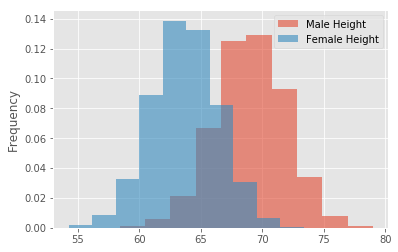

In [6]:
# Your code here
binsize = 10
male_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.6, label = 'Male Height')
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.6, label = 'Female Height')
plt.legend()

# Record your observations - are these inline with your personal observations?
Although there is some overlap between male and female height, it seems that in general, males are taller than females. Both plots are normally distributed

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.hist()`
- The function should return two lists carrying x and y coordinates for plotting the density function

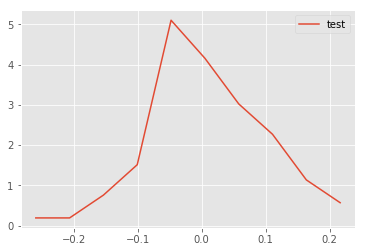

In [8]:
def density(x):
    n, bins = np.histogram(x, 10, density = 1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

C:\Users\akt31\Anaconda3-reboot\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


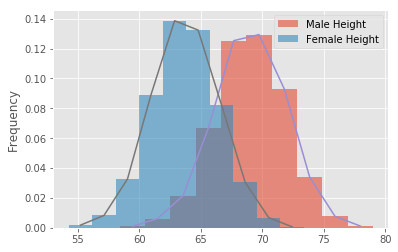

In [9]:
# You code here 
male_df.Height.plot.hist(bins = binsize, normed = True,  alpha = 0.6, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, normed = True, alpha = 0.6, label = 'Female Height');
plt.legend()

x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

## Repeat the above exercise for male and female weights

C:\Users\akt31\Anaconda3-reboot\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


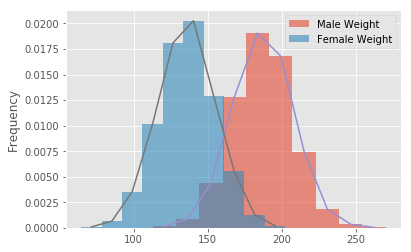

In [10]:
# Your code here 
male_df.Weight.plot.hist(bins = binsize, normed = True,  alpha = 0.6, label ="Male Weight");
female_df.Weight.plot.hist(bins = binsize, normed = True, alpha = 0.6, label = 'Female Weight');
plt.legend()

x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

## Write your observations in the cell below

# Record your observations - are these inline with your personal observations?
The results for weights are similar to those for heights. However, there appears to be less overlap between male and female weights than between male and female heights. Both distributions are normals, and the male plot has a slightly lower peak because it has a wider spread than the female plot. All in all, there is nothing surprising here.
# What is the takeaway when comparing male and female heights and weights?
The takeaway is that because there is less overlap on the weight chart, it is a more suitable way to distinguish between them.


## Repeat the above experiments in seaborn and compare with your results

C:\Users\akt31\Anaconda3-reboot\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


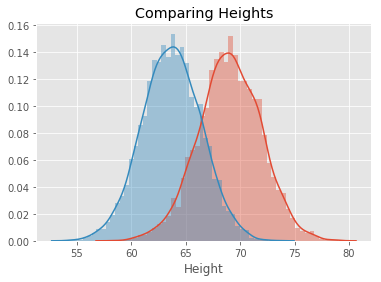

In [11]:
# Code for heights here
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

C:\Users\akt31\Anaconda3-reboot\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


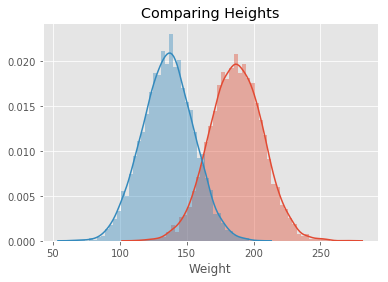

In [12]:
# Code for weights here
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Heights')
plt.show()

# Your comments on the two approaches here. 
The first approach gives you a better understanding of what's happening "under the hood" whereas the second approach is faster and more efficient if you need to do many of these plots
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.